# STEP:1 DATA PRE-PROCESSSING

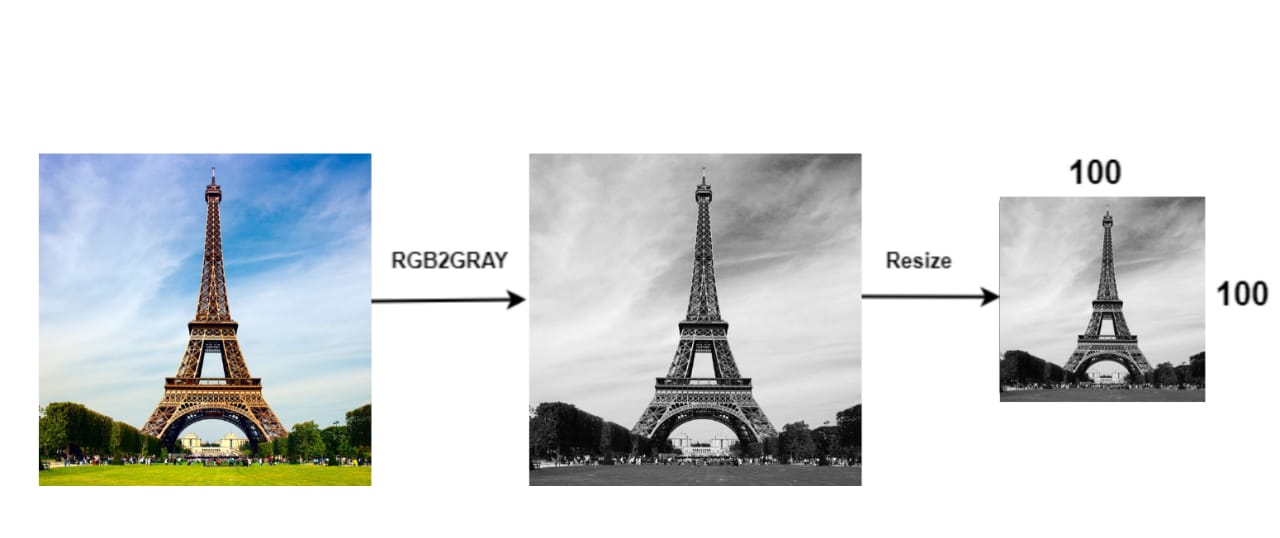

In [1]:
from IPython import display
display.Image('C:/users/Lenovo/Desktop/12data.jpeg')

In [2]:
import cv2
import os

path='C:/users/Lenovo/Desktop/dataset'
categories=os.listdir(path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(categories)
print(labels)                  
print(label_dict)                               # importing the 'withmask' & 'withoutmask' folder from dataset folder

['withmask', 'withoutmask']
[0, 1]
{'withmask': 0, 'withoutmask': 1}


In [3]:
size=100
data=[]
target=[]


for j in categories:
    folder=os.path.join(path,j)
    img_names=os.listdir(folder)
        
    for k in img_names:
        img_path=os.path.join(folder,k)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)              # converting BGR images into grayscale method
            resized=cv2.resize(gray,(size,size))
            data.append(resized)
            target.append(label_dict[j])

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],size,size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)     
new_target# reshaping images into 100 x 100 px sizes

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [5]:
np.save('data',data)                           
np.save('target',new_target)                           # saving 'data' & 'target' arrays